## Mapeando con GeoPandas



En este proyecto, se analiza el consumo de fertilizantes, medido en kilogramos por hectárea arable por país con datos extraidos del Banco Mundial. 
Se utilizaron las librerías GeoPandas y Matplotlib.

In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [8]:

# Lee los datos como lo estabas haciendo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(type(world))
world.head()

warnings.filterwarnings("ignore", category=FutureWarning)


<class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Está perfectamente integrado con Matplotlib, por lo que con solo .plot(), ya podemos ver nuestras formas.

<Axes: >

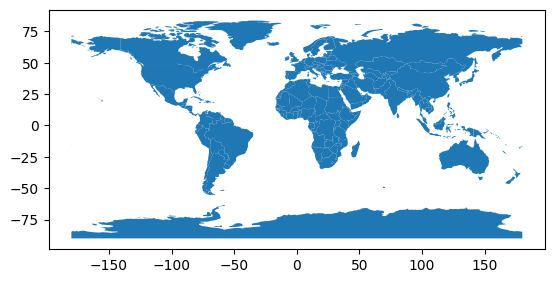

In [9]:
world.plot()

Filtrar las filas que no queremos mostrar e incluso podemos seleccionar una columna para codificarla.

<Axes: >

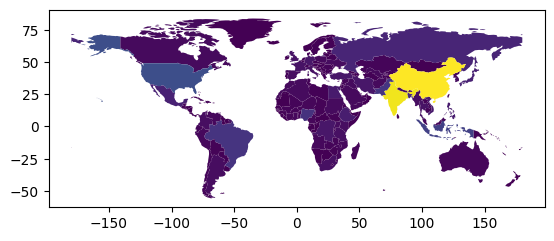

In [10]:
world = world[world.name != "Antarctica"] # esto elimina informacion irrelevante en este caso como el continente antartica. 
world.plot(column='pop_est') # esto coloreara el mapa segun la columna cantidad de poblacion del pais

Utiliza diferentes colores y gradientes entre esos colores para mostrar la población del país.

In [11]:
#.venv\Include\indicators.csv

In [30]:
df = pd.read_csv('..\\Include\\indicators.csv')
df.head()

,country_name,country_code,indicator_name,indicator_code,year,value
0,Aruba,ABW,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1960,NaN
1,Aruba,ABW,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1961,NaN
2,Aruba,ABW,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1962,NaN
3,Aruba,ABW,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1963,NaN
4,Aruba,ABW,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1964,NaN


Elimino valores nulos 

In [13]:
# Filtrar los valores nulos en la columna 'value'
df = df[df['value'].notnull()]


Contar el número de registros


In [14]:
num_registros = df.shape[0]
num_registros

8505965

In [15]:
df.head()

,country_name,country_code,indicator_name,indicator_code,year,value
177,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2009,1.355
178,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2010,2.745
180,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2012,78.185
181,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2013,1.160
182,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2014,3.950


Este conjunto de datos tiene muchos indicadores diferentes. Así que seleccionemos solo uno de ellos.  
Se usa bucle for para revisar los indicadores únicos y seleccionar.

In [31]:
for i in df['indicator_name'].unique()[:5]:
    print(i)

Agricultural machinery, tractors
Fertilizer consumption (% of fertilizer production)
Fertilizer consumption (kilograms per hectare of arable land)
Agricultural land (sq. km)
Agricultural land (% of land area)


Verifico los último años con datos

In [32]:
# Obtener los años únicos y ordenarlos de forma descendente
unique_years_sorted = sorted(df['year'].unique(), reverse=True)

# Imprimir los cinco años más grandes
for i in unique_years_sorted[:5]:
    print(i)


2023
2022
2021
2020
2019


Eligire la categoria para analizar Fertilizer consumption (kilograms per hectare of arable land) para el ultimo ano con valores disponibles, 2021

In [33]:
fertilizer_df = df[(df['indicator_name'] == 'Fertilizer consumption (kilograms per hectare of arable land)') &
              (df['year'] == 2021)].copy()
fertilizer_df.head(10)

,country_name,country_code,indicator_name,indicator_code,year,value
189,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,3.855000
95677,Africa Eastern and Southern,AFE,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,28.821585
191165,Afghanistan,AFG,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,5.202572
286653,Africa Western and Central,AFW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,15.443304
382141,Angola,AGO,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,5.606855
477629,Albania,ALB,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,NaN
573117,Andorra,AND,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,NaN
668605,Arab World,ARB,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,55.092598
764093,United Arab Emirates,ARE,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,626.804970
859581,Argentina,ARG,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2021,62.179191


Ahora tenemos que ver qué variables tienen en común nuestros conjuntos de datos. Nuestro Fertilizer_df tiene un nombre de país y un código de país, y se supone que son los mismos valores que tenemos en nuestro mapa mundial como "nombre" e "iso_a3". Veamos esto.

In [19]:
countries_f = fertilizer_df.country_code.unique()
countries_w = world.iso_a3.unique()
for iso in countries_w:
    if iso not in countries_f: 
        print(world[world['iso_a3'] == iso][['name',
                                             'iso_a3']].values)

[['W. Sahara' 'ESH']]
[['Falkland Is.' 'FLK']]
[['Greenland' 'GRL']]
[['Fr. S. Antarctic Lands' 'ATF']]
[['Puerto Rico' 'PRI']]
[['Albania' 'ALB']]
[['Taiwan' 'TWN']]
[['Georgia' 'GEO']]
[['N. Cyprus' 'CYN']]
[['Somaliland' 'SOL']]
[['Kosovo' '-99']]


Pandas .merge() realiza el equivalente a una unión SQL; solo necesitamos asegurarnos de que las columnas que estamos usando para unir nuestros conjuntos de datos tengan el mismo nombre, luego seleccionamos el tipo de unión que estamos realizando, le decimos a pandas que haga una copia del resultado y lo guardamos en una variable.

In [20]:
# rename code column and drop rows with empty cells 
fertilizer_df.rename({'country_code':'iso_a3'}, axis=1, inplace=True)
fertilizer_df = fertilizer_df [['iso_a3', 'value']].dropna()
# merge dataframes and filter columns
world_values = world.merge(fertilizer_df, how='inner', on='iso_a3', copy=True)
world_values = world_values[['name', 'iso_a3', 'geometry', 'value']]

Ya agregamos nuestros datos al GeoDataFrame mundial

<Axes: >

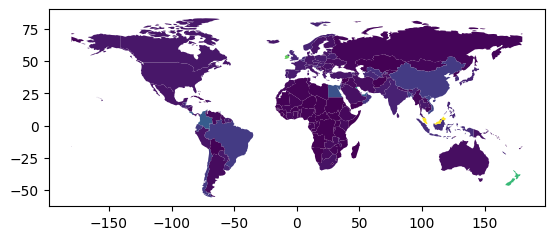

In [21]:
world_values.plot(column='value')

Arreglando la estética.

Como realizamos una unión interna, perdimos los polígonos de los países sin valores en nuestro Fertilizer_df, así que tracemos nuestro mapa original y, encima de eso, nuestro nuevo gráfico.

<Axes: >

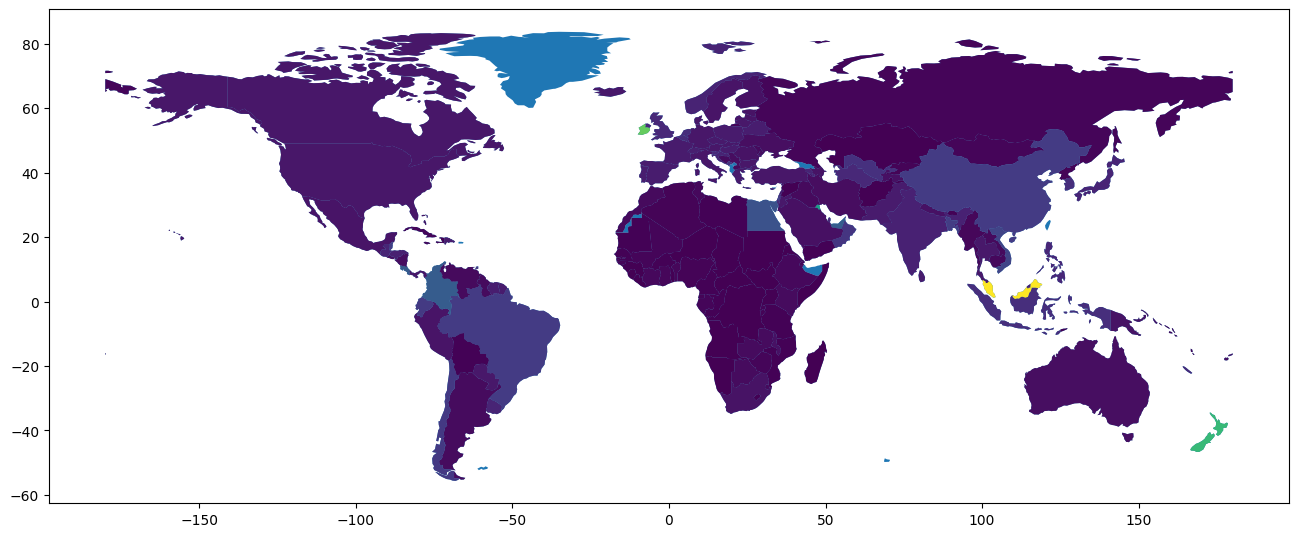

In [22]:
fig, ax = plt.subplots(1, figsize=(16,8))
world.plot(ax=ax)
world_values.plot(column='value', ax=ax)

Esos colores no son nada intuitivos.Para nuestros datos, es mejor usar una barra de colores, variando en intensidad para mostrar diferentes valores. También podemos cambiar el color de nuestro mapa de fondo, para que nuestros espectadores sepan que no tenemos datos allí.

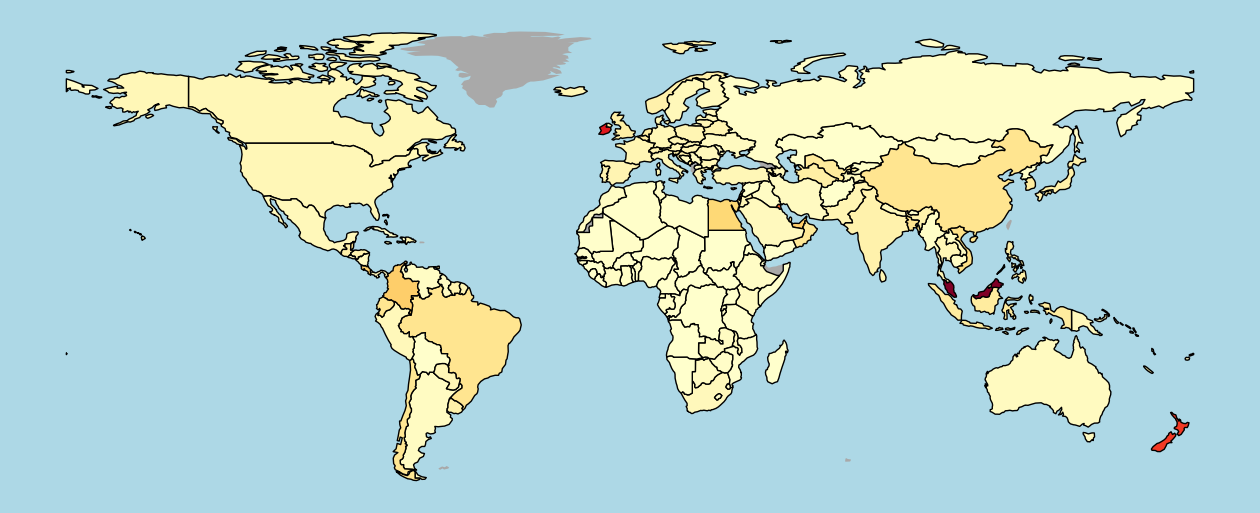

In [23]:

# Crear una figura y ejes
fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='lightblue')

# Dibujar el mapa mundial en gris
world.plot(ax=ax, color='darkgrey')

# Dibujar el mapa de valores de fertilizantes por país, usando una escala de colores de amarillo a rojo
#lineas negras remarcando paises
world_values.plot(column='value', ax=ax, cmap='YlOrRd', edgecolors='black')


ax.axis('off')


# Mostrar el mapa
plt.show()

Dare informacion sobre los datos de fertilizacion

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

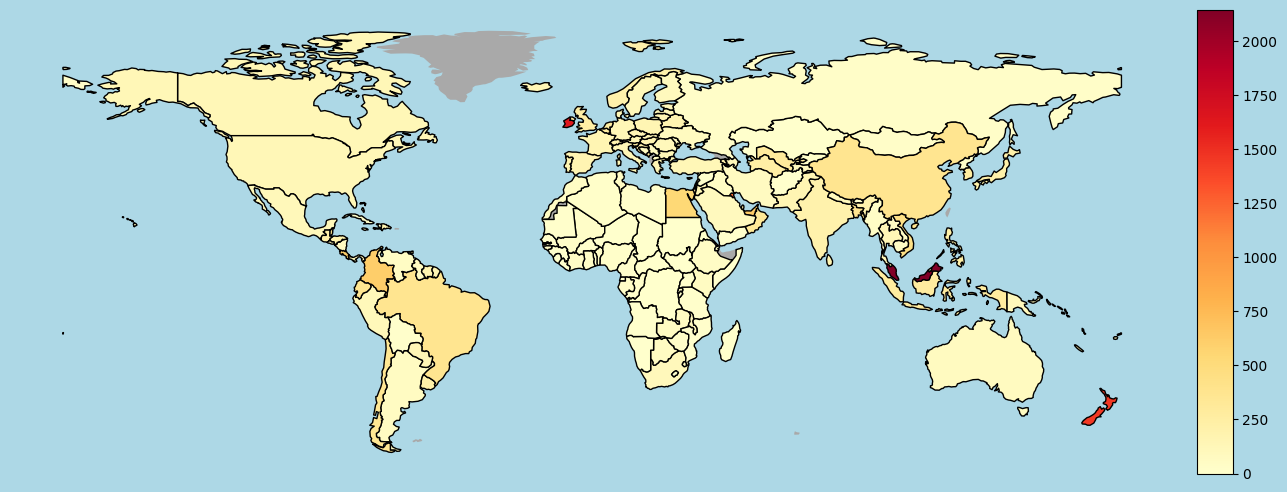

In [25]:

# Crear una figura y ejes
fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='lightblue')

# Dibujar el mapa mundial en gris
world.plot(ax=ax, color='darkgrey')

# Dibujar el mapa de valores de fertilizantes por país, usando una escala de colores de amarillo a rojo
#lineas negras remarcando paises
world_values.plot(column='value', ax=ax, cmap='YlOrRd', edgecolors='black')

# set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
vmax = world_values.value.max()
mappable = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)

ax.axis('off')


# Mostrar el mapa
plt.show()

Usamos los kits de herramientas de Matplotlib para ubicar nuestro eje, creamos una división a la derecha con un 3% del tamaño de nuestro gráfico principal y agregamos un poco de relleno entre ellos. Después de construir el espacio para nuestra barra de colores, necesitamos crear un Objeto Mapeable. Mappable distribuirá nuestro mapa de colores en un rango normalizado (0 a 1), por lo que para crear uno, necesitamos un mapa de colores (cmap) y un objeto normalizador que podemos obtener con .normalize(min, max). Después de eso, lo único que queda por hacer es pasar el mapeable y el nuevo eje a nuestra función .colorbar(). Matplotlib se encarga del resto. Tenga en cuenta que nuestra barra de colores es como cualquier otro gráfico, por lo que podemos acceder y cambiar sus propiedades como lo hacemos con otros gráficos de Matplotlib.

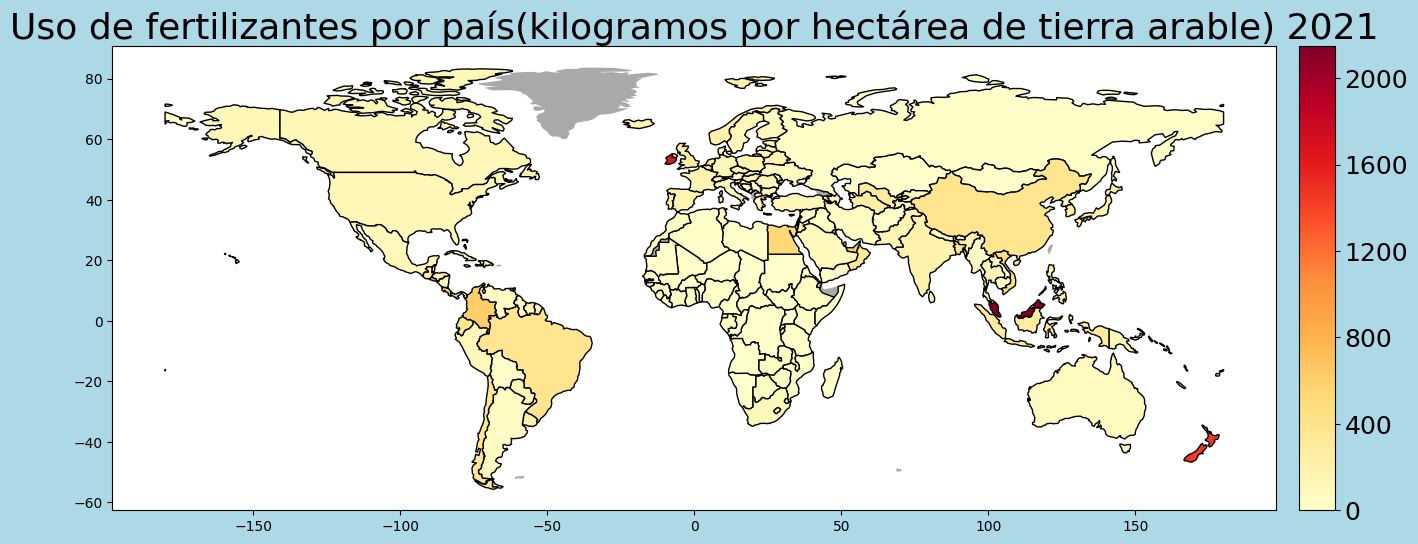

In [34]:

# Crear una figura y ejes
fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='lightblue')

# Dibujar el mapa mundial en gris
world.plot(ax=ax, color='darkgrey')

# Dibujar el mapa de valores de fertilizantes por país, usando una escala de colores de amarillo a rojo
#lineas negras remarcando paises
world_values.plot(column='value', ax=ax, cmap='YlOrRd', edgecolors='black')

# set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
vmax = world_values.value.max()
mappable = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)

cbar.set_ticks(np.arange(0, vmax, 400))
cbar.ax.tick_params(labelsize=18)


ax.set_title('Uso de fertilizantes por país(kilogramos por hectárea de tierra arable) 2021', fontsize=26)
plt.savefig('Uso Mundial de Fertilizantes.png')
# Mostrar el mapa
plt.show()

Paises en el Top 10 de uso de fertilizantes por hectareas arables. 

In [27]:
#ranking de paises

# Crear una copia del DataFrame world_values para mantener los datos originales
world_values_copy = world_values.copy()

# Ordenar el DataFrame por la cantidad de fertilizante usada de forma descendente
world_values_sorted = world_values_copy.sort_values(by='value', ascending=False)

# Tomar las primeras 10 filas del DataFrame ordenado (el top 10)
top_10_countries = world_values_sorted[['name', 'value']].head(10)

# Imprimir el top 10 de países junto con la cantidad de fertilizante usada
print(top_10_countries)

                     name        value
140              Malaysia  2146.253789
127               Ireland  1637.092569
130           New Zealand  1445.046023
81                 Kuwait  1208.143750
79   United Arab Emirates   626.804970
28               Colombia   615.311570
30             Costa Rica   595.829959
153                 Egypt   542.573936
89                Vietnam   427.590601
94             Bangladesh   384.209618
